In [1]:
# 로이터 뉴스 데이터셋 불러오기.
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import reuters

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 불러온 데이터 학습셋과 데이터셋으로 분활.
(x_train, y_train), (x_test, y_test)= reuters.load_data(num_words= 1000, test_split= .2)

In [3]:
# 데이터 확인 후 출력.
category= np.max(y_train) +1
print('카테고리: ', category)
print('학습용 뉴스 기사: ', len(x_train))
print('테스트용 뉴스 기사: ', len(x_test))
print(x_train[0])

카테고리:  46
학습용 뉴스 기사:  8982
테스트용 뉴스 기사:  2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 단어 수 맞춤.
x_train= sequence.pad_sequences(x_train, maxlen= 100)
x_test= sequence.pad_sequences(x_test, maxlen= 100)

In [5]:
# 원-핫 인코딩 처리.
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [6]:
# 모델의 구조를 설정.
model= Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation= 'tanh'))
model.add(Dense(46, activation= 'softmax'))

In [7]:
# 모델의 실행 옵션 설정.
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam',
              metrics= ['accuracy'])

# 학습의 조기 중단 설정.
early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience= 5)

# 모델 실행.
history= model.fit(x_train, y_train, batch_size= 20, epochs= 200, 
                   validation_data= (x_test, y_test), callbacks= [early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 17s 18ms/step - loss: 2.2993 - accuracy: 0.4202 - val_loss: 2.0450 - val_accuracy: 0.4960
Epoch 2/200
450/450 [==============================] - 4s 8ms/step - loss: 1.9102 - accuracy: 0.5145 - val_loss: 1.7883 - val_accuracy: 0.5472
Epoch 3/200
450/450 [==============================] - 4s 9ms/step - loss: 1.6991 - accuracy: 0.5696 - val_loss: 1.6503 - val_accuracy: 0.5833
Epoch 4/200
450/450 [==============================] - 4s 9ms/step - loss: 1.5497 - accuracy: 0.6116 - val_loss: 1.5178 - val_accuracy: 0.6327
Epoch 5/200
450/450 [==============================] - 4s 9ms/step - loss: 1.3590 - accuracy: 0.6530 - val_loss: 1.3844 - val_accuracy: 0.6523
Epoch 6/200
450/450 [==============================] - 4s 9ms/step - loss: 1.2368 - accuracy: 0.6887 - val_loss: 1.2987 - val_accuracy: 0.6732
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.1365 - accuracy: 0.7142 - val_loss: 1.2622 - val_accuracy: 0.67

LSTM을 이용해 로이터 뉴스 카테고리 분석

Epoch 1/200
450/450 [==============================] - 6s 10ms/step - loss: 2.1866 - accuracy: 0.4459 - val_loss: 1.9597 - val_accuracy: 0.5053
Epoch 2/200
450/450 [==============================] - 4s 9ms/step - loss: 1.8050 - accuracy: 0.5301 - val_loss: 1.7347 - val_accuracy: 0.5659
Epoch 3/200
450/450 [==============================] - 4s 9ms/step - loss: 1.6124 - accuracy: 0.5857 - val_loss: 1.6044 - val_accuracy: 0.5975
Epoch 4/200
450/450 [==============================] - 4s 9ms/step - loss: 1.4356 - accuracy: 0.6330 - val_loss: 1.4502 - val_accuracy: 0.6287
Epoch 5/200
450/450 [==============================] - 4s 9ms/step - loss: 1.2845 - accuracy: 0.6742 - val_loss: 1.3121 - val_accuracy: 0.6714
Epoch 6/200
450/450 [==============================] - 5s 11ms/step - loss: 1.1693 - accuracy: 0.7017 - val_loss: 1.2595 - val_accuracy: 0.6741
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.0688 - accuracy: 0.7288 - val_loss: 1.1914 - val_accuracy: 0.69

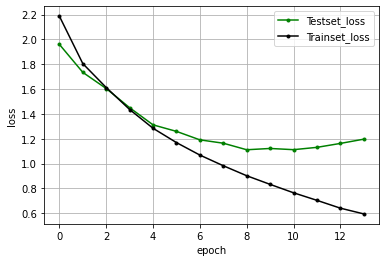

In [8]:
# 불러온 데이터 학습셋과 데이터셋으로 분활.
(x_train, y_train), (x_test, y_test)= reuters.load_data(num_words= 1000, test_split= .2)

# 데이터 확인.
category= np.max(y_train) +1

# 단어 수 맞춤.
x_train= sequence.pad_sequences(x_train, maxlen= 100)
x_test= sequence.pad_sequences(x_test, maxlen= 100)

# 원-핫 인코딩 처리.
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

# 모델의 구조를 설정.
model= Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation= 'tanh'))
model.add(Dense(46, activation= 'softmax'))

# 모델의 실행 옵션 설정.
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam',
              metrics= ['accuracy'])

# 학습의 조기 중단 설정.
early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience= 5)

# 모델 실행.
history= model.fit(x_train, y_train, batch_size= 20, epochs= 200, 
                   validation_data= (x_test, y_test), callbacks= [early_stopping_callback])

# 테스트 정확도 출력.
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

# 검증셋과 학습셋이 오차 저장.
y_vloss= history.history['val_loss']
y_loss= history.history['loss']

# 그래프화.
x_len= np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c= 'green', label= 'Testset_loss')
plt.plot(x_len, y_loss, marker= '.', c= 'black', label= 'Trainset_loss')

# 그래프에 그리드 추가, 레이블 표시.
plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()